Cluster 1 - Total images: 396
Sample images from Cluster 1:


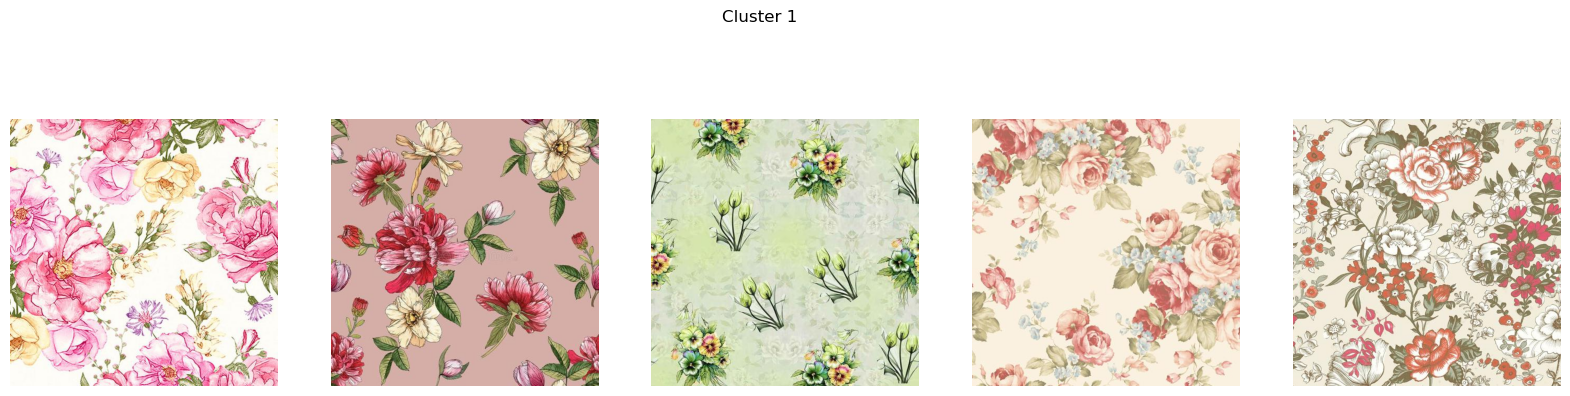

Cluster 2 - Total images: 370
Sample images from Cluster 2:


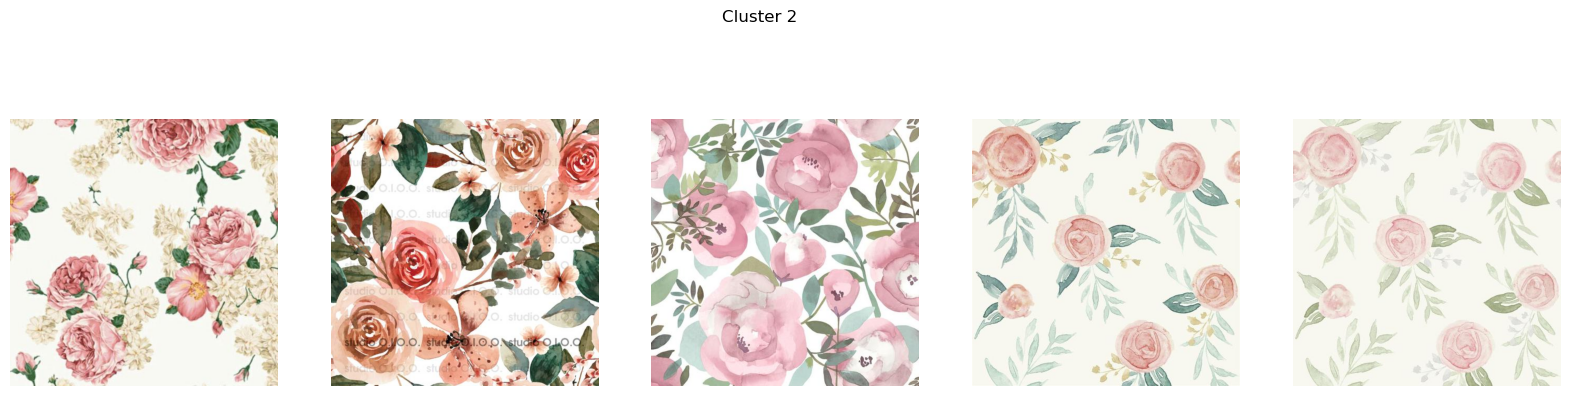

Cluster 3 - Total images: 232
Sample images from Cluster 3:


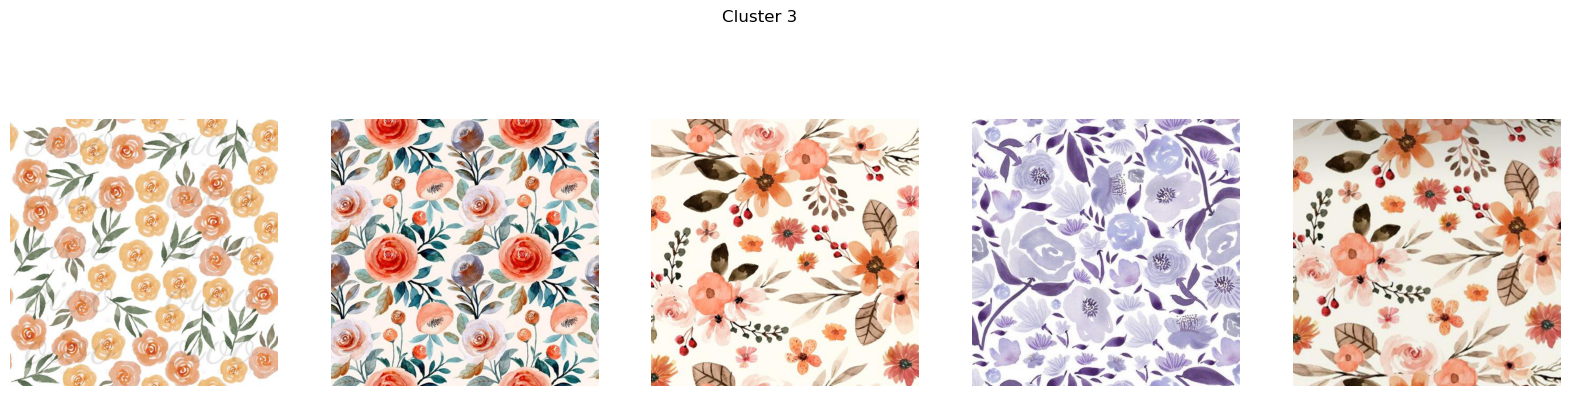

Cluster 4 - Total images: 299
Sample images from Cluster 4:


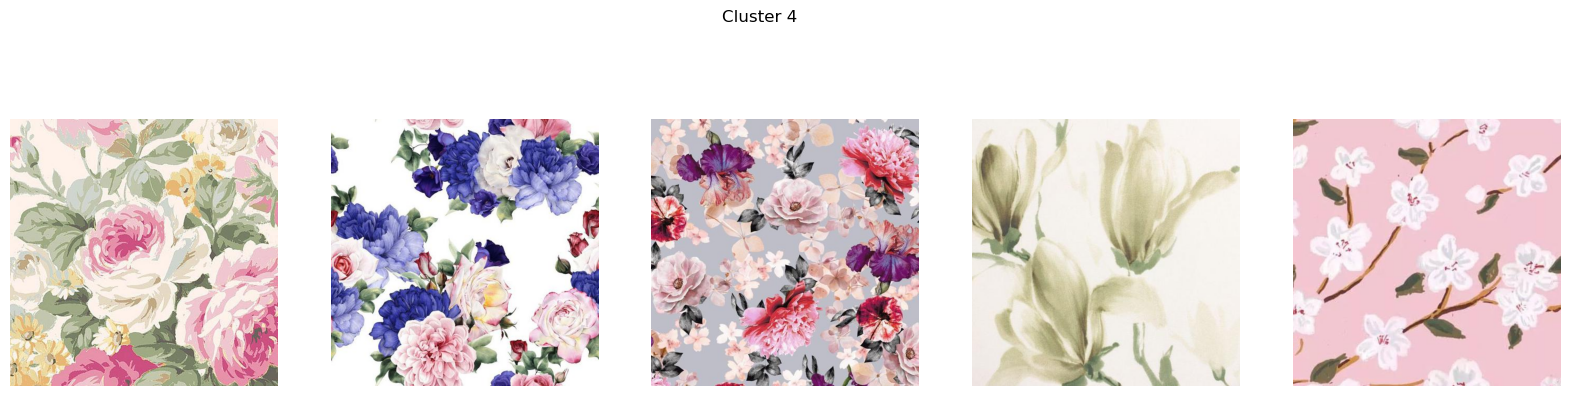

Cluster 5 - Total images: 259
Sample images from Cluster 5:


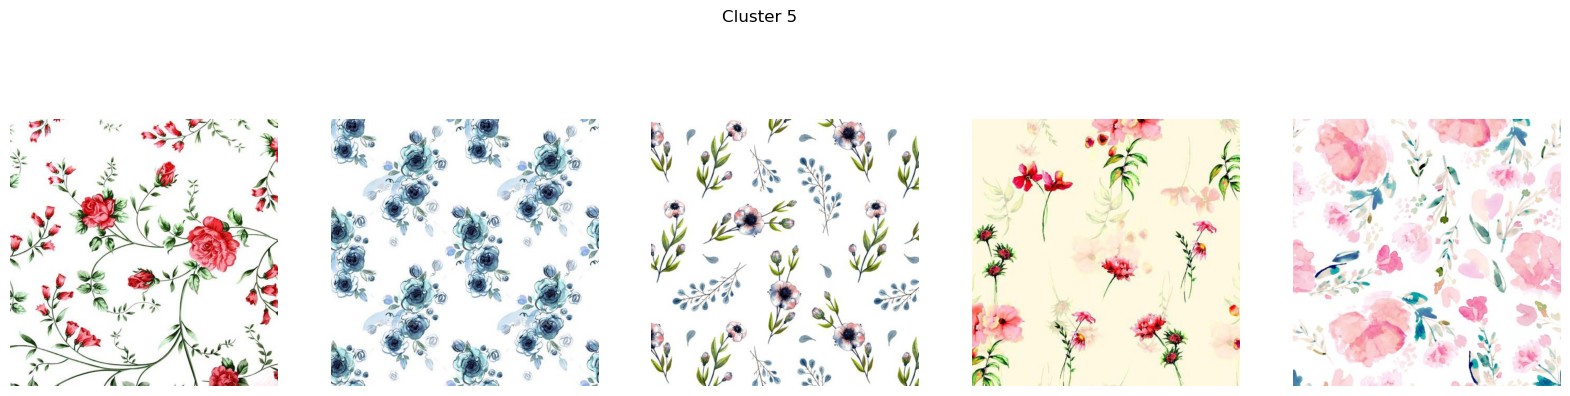

Cluster 6 - Total images: 408
Sample images from Cluster 6:


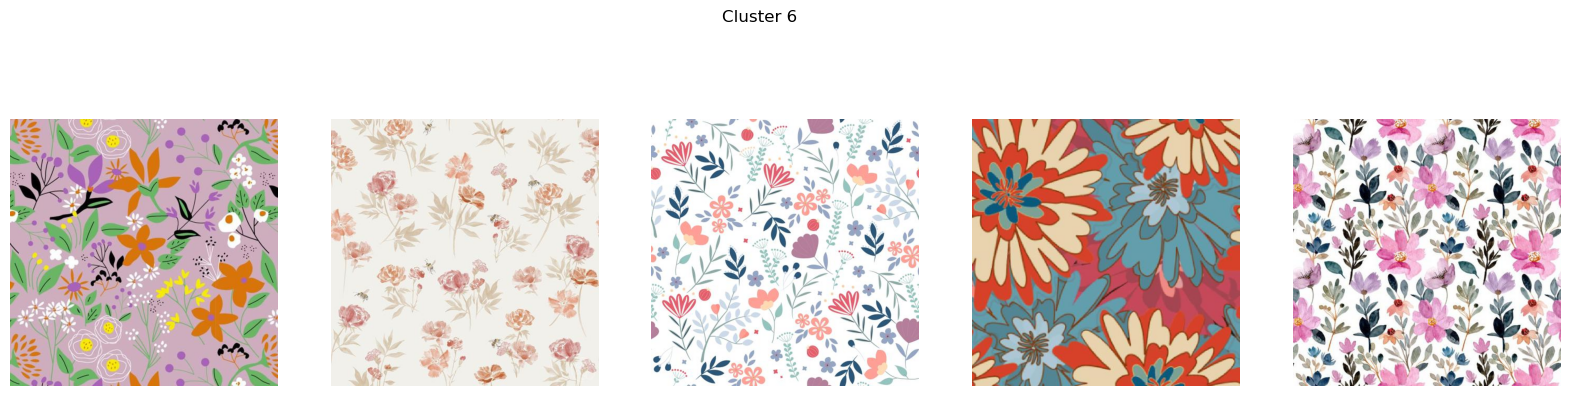

Cluster 7 - Total images: 235
Sample images from Cluster 7:


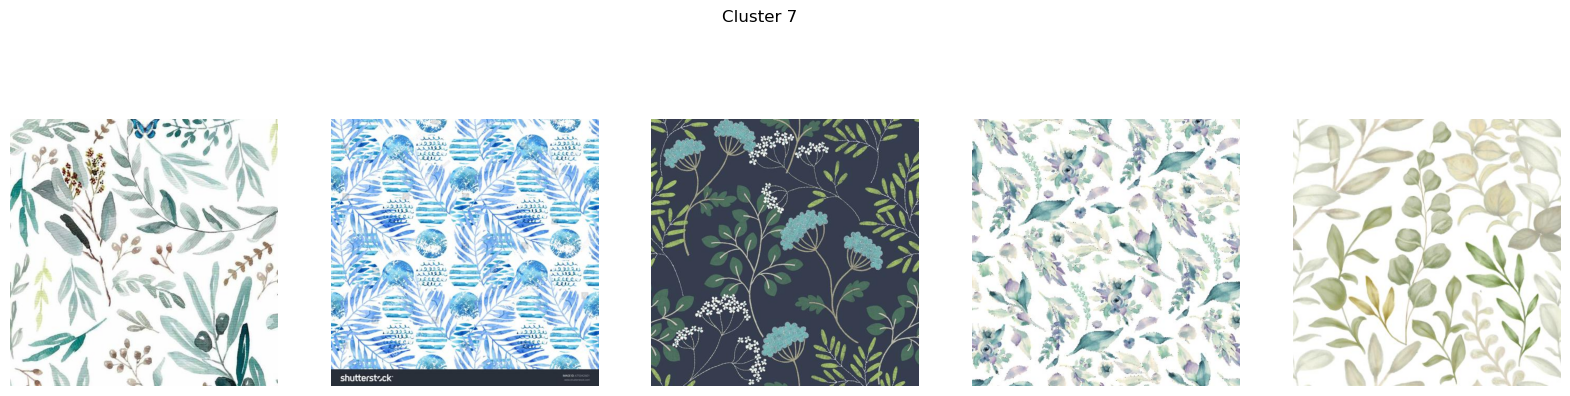

Cluster 8 - Total images: 301
Sample images from Cluster 8:


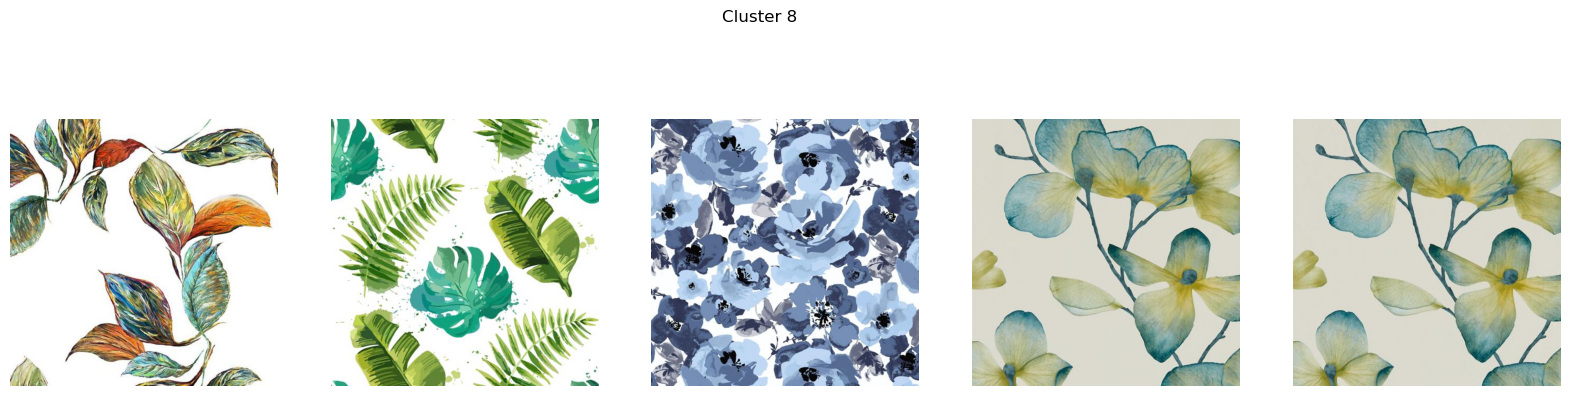

Clustering completed with 8 clusters.


In [1]:
import numpy as np
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.preprocessing import image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
import os
import cv2
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Function to extract MobileNetV2 features from images
def extract_features_mobilenet_v2(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = mobilenet_v2_model.predict(img_data, verbose=0)
    return features.flatten()

# Path to the folder containing images
folder_path = "class"

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found.")
else:
    # Load pre-trained MobileNetV2 model
    mobilenet_v2_model = MobileNetV2(weights='imagenet', include_top=False)

    # Initialize lists to store image paths and feature vectors
    image_paths = []
    feature_vectors = []

    # Loop through images, extract features, and collect paths and feature vectors
    for file_name in os.listdir(folder_path)[:2500]:
        if file_name.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            image_path = os.path.join(folder_path, file_name)
            image_paths.append(image_path)
            features = extract_features_mobilenet_v2(image_path)
            feature_vectors.append(features)

    # Convert the list of feature vectors to a NumPy array
    feature_vectors = np.array(feature_vectors)

    # Optionally reduce dimensionality using PCA
    pca = PCA(n_components=100)  # You can change the number of components
    reduced_features = pca.fit_transform(feature_vectors)

    # Define the number of clusters (K)
    num_clusters = 8  # Change this according to your requirement

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(reduced_features)
    cluster_labels = kmeans.labels_

    # Assign images to their respective clusters
    clusters = {i: [] for i in range(num_clusters)}
    for i, label in enumerate(cluster_labels):
        clusters[label].append(image_paths[i])

# Visualization of clusters remains the same as in the earlier code
# Displaying the clusters using matplotlib
for cluster, images in clusters.items():
    print(f"Cluster {cluster + 1} - Total images: {len(images)}")
    print(f"Sample images from Cluster {cluster + 1}:")
    sample_images = images[:5]  # Select the first 5 images from each cluster or all available images if less than 5
    plt.figure(figsize=(20, 5))
    plt.suptitle(f"Cluster {cluster + 1}")

    num_images = len(sample_images)
    if num_images < 5:
        plt.subplots_adjust(wspace=0.5)
        for i in range(5):
            if i < num_images:
                img_path = sample_images[i]
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.subplot(1, 5, i + 1)
                plt.imshow(img)
                plt.axis('off')
            else:
                plt.subplot(1, 5, i + 1)
                plt.axis('off')
    else:
        for i, img_path in enumerate(sample_images):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.axis('off')
    plt.show()

print(f"Clustering completed with {len(clusters)} clusters.")
